<a href="https://colab.research.google.com/github/jongheonleee/LLM_study/blob/main/tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

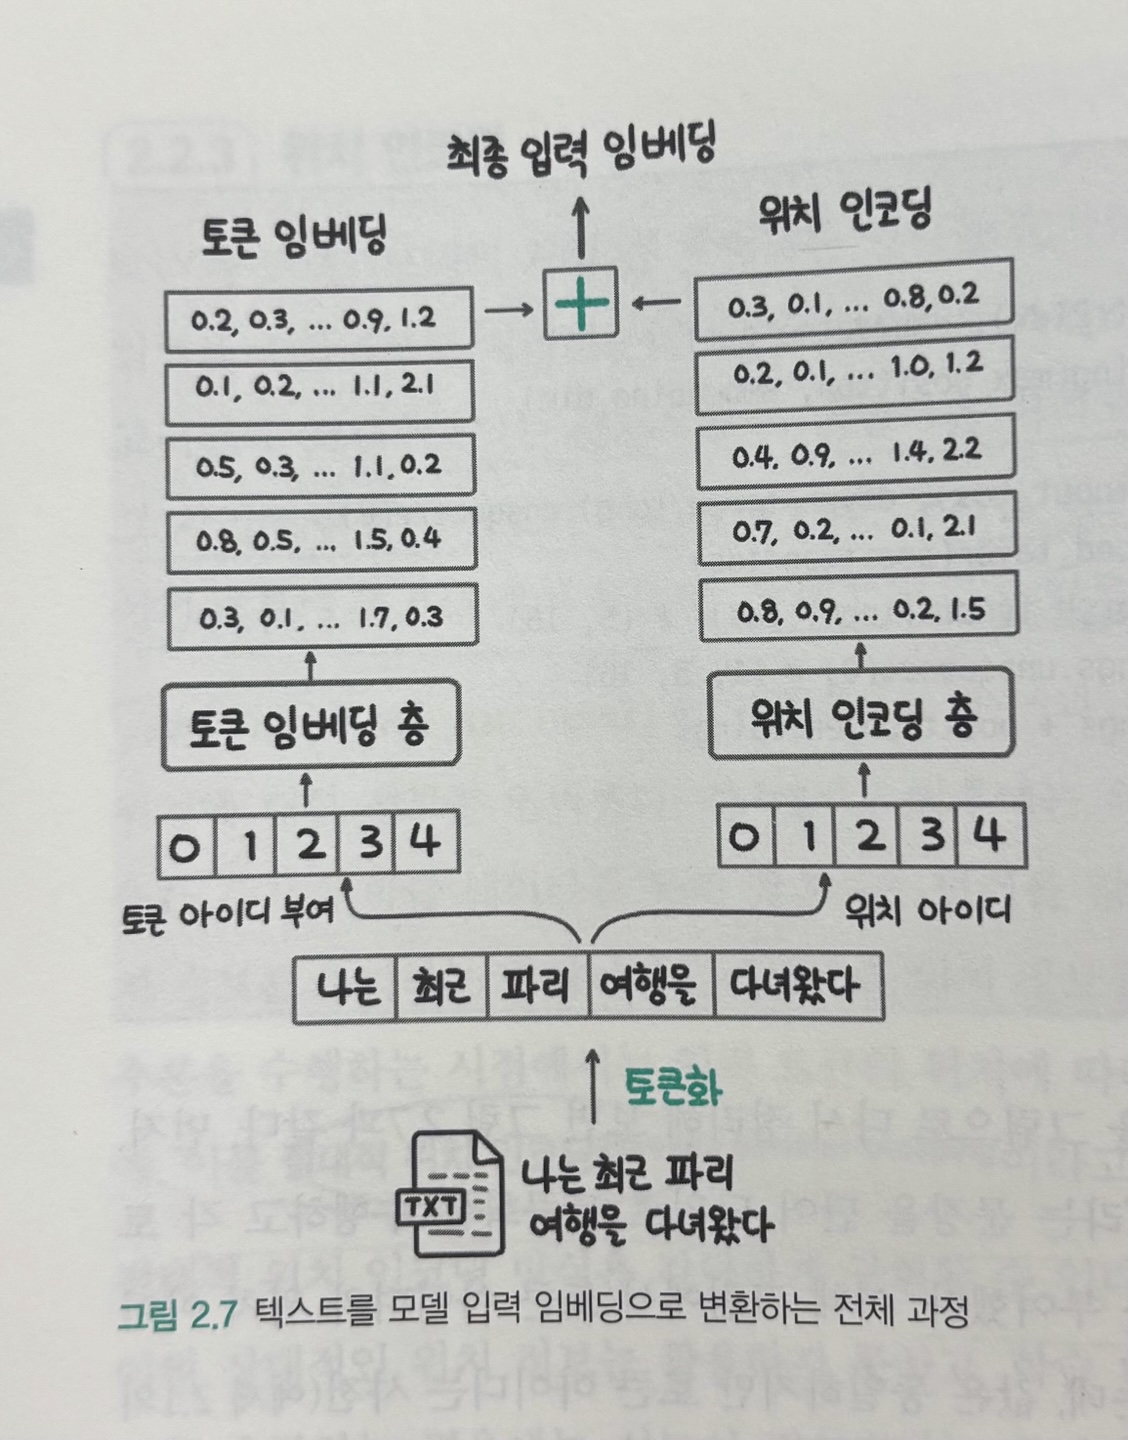

In [1]:
# > 토큰화 <

# 띄워쓰기 단위로 분리
input_text = '나는 최근 파리 여행을 다녀왔다'
input_text_list = input_text.split()
print('input text list => ', input_text_list)

# 토큰 -> 아이디 딕셔너리와 아이디 -> 토큰 딕셔너리 만듦
str2idx = {word:idx for idx, word in enumerate(input_text_list)}
idx2str = {idx:word for idx, word in enumerate(input_text_list)}
print('str2idx => ', str2idx)
print('idx2str => ', idx2str)

# 토큰을 토큰 아이디로 변환
input_ids = [str2idx[word] for word in input_text_list]
print('input_ids => ', input_ids)

# 출력 결과
# input text list =>  ['나는', '최근', '파리', '여행을', '다녀왔다']
# str2idx =>  {'나는': 0, '최근': 1, '파리': 2, '여행을': 3, '다녀왔다': 4}
# idx2str =>  {0: '나는', 1: '최근', 2: '파리', 3: '여행을', 4: '다녀왔다'}
# input_ids =>  [0, 1, 2, 3, 4]

input text list =>  ['나는', '최근', '파리', '여행을', '다녀왔다']
str2idx =>  {'나는': 0, '최근': 1, '파리': 2, '여행을': 3, '다녀왔다': 4}
idx2str =>  {0: '나는', 1: '최근', 2: '파리', 3: '여행을', 4: '다녀왔다'}
input_ids =>  [0, 1, 2, 3, 4]


In [2]:
# > 토큰 임베딩으로 변환하기 <
import torch.nn as nn
import torch

embedding_dim = 16
embed_layer = nn.Embedding(len(str2idx), embedding_dim)

# 현재 임베딩 층은 그저 입력 토큰 아이디를 16차원의 임의의 숫자 집합으로 바꿔줄 뿐임
input_embeddings = embed_layer(torch.tensor(input_ids))
input_embeddings = input_embeddings.unsqueeze(0)
input_embeddings.shape


# 출력결과
# torch.Size([1, 5, 16])

torch.Size([1, 5, 16])

In [3]:
# > 절대적 위치 인코딩 <

embedding_dim = 16
max_position = 12
embed_layer = nn.Embedding(len(str2idx), embedding_dim)
position_embed_layer = nn.Embedding(max_position, embedding_dim)

position_ids = torch.arange(len(input_ids), dtype=torch.long).unsqueeze(0)
position_encodings = position_embed_layer(position_ids)
token_embeddings = embed_layer(torch.tensor(input_ids))
token_embeddings = token_embeddings.unsqueeze(0)
input_embeddings = token_embeddings + position_encodings
input_embeddings.shape

# 출력 결과
# torch.Size([1, 5, 16])

torch.Size([1, 5, 16])